Basic Regression

In [587]:
# !pip install openpyxl

1. Import Libraries

In [588]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import math

2. Load Data

In [589]:
df = pd.read_excel('../00_Data/streetlights_india.xlsx')
df.head()

,Road,Poles
0,849.000,29839
1,594.725,23789
2,587.400,23496
3,575.200,23008
4,571.925,22877


3. Split Feature and Target

In [590]:
X = df[['Road']]
y = df['Poles']

4. Split Training and Testing Data

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

5. Build Model

In [592]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

y = mx + c

m => Slope <br>
c => Intercept

In [593]:
# Slope
slope = model.coef_
slope

array([37.88167835])

In [594]:
# Intercept
intercept = model.intercept_
intercept

np.float64(-20.424437181917142)

y = 38.6x - 30

In [595]:
# x = 100km

y = (38.6 * 100) - 30
y

3830.0

In [ ]:
model.predict([[100]])

Visual Analysis

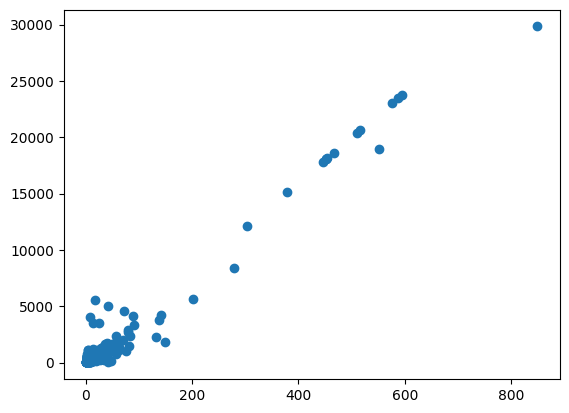

In [597]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_train, y_train)

In [598]:
y_pred = model.predict(X_train)
y_pred

array([ 1.65811273e+03,  6.60309323e+02,  3.94379941e+02,  3.29223454e+02,
        4.29988718e+02,  1.86258000e+02,  5.53389195e+01,  7.42797587e+01,
        5.47800738e+02,  7.39860847e+02,  2.63688150e+02,  2.29594640e+02,
        1.26906789e+03,  8.50854165e+02,  8.79265424e+02,  1.65574604e+02,
        9.32205979e+01,  3.71272117e+02,  1.15390759e+03,  4.34155703e+02,
        5.34448356e+01,  3.20510668e+02,  3.58392346e+02,  7.70469243e+02,
        3.44376125e+02,  7.04915909e+01,  1.23525941e+02,  2.35352655e+02,
        4.34155703e+02,  2.82628990e+02, -8.30230011e+00,  1.06791618e+03,
        2.06865633e+02,  1.20580549e+03,  3.74681468e+02,  2.06865633e+02,
        5.13025357e+02,  1.12161437e+02,  3.98074314e+01,  6.21576216e+01,
        3.09146164e+02,  1.00796934e+02,  2.44747311e+02,  4.66733946e+02,
        3.08284265e+03,  1.93834336e+02,  4.72037381e+02,  1.75802657e+02,
        1.31102276e+02,  4.76204366e+02,  1.50800749e+02,  2.23306281e+02,
        6.65991575e+02,  

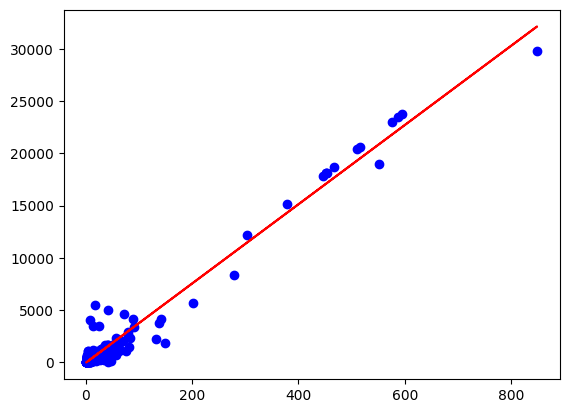

In [599]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_train, y_train, c='b')
ax.plot(X_train, y_pred, c='r')

Test the Model Performance

In [600]:
y_test_pred = model.predict(X_test)

In [601]:
model.score(X_test, y_test) * 100

96.79702703120434

In [602]:
model.score(X_train, y_train)

0.9702284934603687

Evaluation Metrics

In [603]:
# Training Score
y_pred = model.predict(X_train)
mse = round(mean_squared_error(y_train, y_pred), 2)
rmse = round(math.sqrt(mse), 2)
mae = round(mean_absolute_error(y_train, y_pred), 2)
train_r2 = round(model.score(X_train, y_train) * 100, 2)

df_evaluation = pd.DataFrame([
    ['MSE', mse],
    ['RMSE', rmse],
    ['MAE', mae],
    ['R2', train_r2]
])
df_evaluation.columns = ['Metrics', 'Values']
df_evaluation

,Metrics,Values
0,MSE,244553.97
1,RMSE,494.52
2,MAE,211.73
3,R2,97.02


In [604]:
# Test Score
y_pred = model.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(math.sqrt(mse), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
test_r2 = round(model.score(X_test, y_test) * 100, 2)

df_evaluation = pd.DataFrame([
    ['MSE', mse],
    ['RMSE', rmse],
    ['MAE', mae],
    ['R2', test_r2]
])
df_evaluation.columns = ['Metrics', 'Values']
df_evaluation

,Metrics,Values
0,MSE,106644.91
1,RMSE,326.57
2,MAE,159.85
3,R2,96.80


In [605]:
#Deviation

abs(train_r2 - test_r2)

0.21999999999999886